In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

628

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qeshm
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | biaora
Processing Record 4 of Set 1 | cangucu
Processing Record 5 of Set 1 | zhigansk
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | lima
Processing Record 18 of Set 1 | hami
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | ukiah
Processing Re

Processing Record 36 of Set 4 | paide
Processing Record 37 of Set 4 | airai
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | ketchikan
Processing Record 40 of Set 4 | amet
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 43 of Set 4 | blythe
Processing Record 44 of Set 4 | bauchi
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | primorsko-akhtarsk
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | dvinskoy
Processing Record 50 of Set 4 | port macquarie
Processing Record 1 of Set 5 | karibib
Processing Record 2 of Set 5 | neiafu
Processing Record 3 of Set 5 | sheregesh
Processing Record 4 of Set 5 | bambous virieux
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | sabha
Processing Record 7 of Set 5 | san rafael
Processing Record 8 of Set 5 | ceres
Processing Record 9 of Set 5 | emba
Processi

Processing Record 26 of Set 8 | lahaina
Processing Record 27 of Set 8 | lubango
Processing Record 28 of Set 8 | ossora
Processing Record 29 of Set 8 | birnin kebbi
Processing Record 30 of Set 8 | linchuan
City not found. Skipping...
Processing Record 31 of Set 8 | atar
Processing Record 32 of Set 8 | port blair
Processing Record 33 of Set 8 | farrukhnagar
Processing Record 34 of Set 8 | nanortalik
Processing Record 35 of Set 8 | hasaki
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | candido mendes
Processing Record 38 of Set 8 | shirokiy
Processing Record 39 of Set 8 | peace river
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | zapolyarnyy
Processing Record 42 of Set 8 | rafai
Processing Record 43 of Set 8 | meadow lake
Processing Record 44 of Set 8 | villa carlos paz
Processing Record 45 of Set 8 | gushikawa
Processing Record 46 of Set 8 | deputatskiy
Processing Record 47 of Set 8 | gambela
Processing Record 48 of Set 8 | santiago de

Processing Record 9 of Set 12 | mariental
Processing Record 10 of Set 12 | wanning
Processing Record 11 of Set 12 | anderson
Processing Record 12 of Set 12 | sayat
Processing Record 13 of Set 12 | altagracia de orituco
Processing Record 14 of Set 12 | daru
Processing Record 15 of Set 12 | moses lake
Processing Record 16 of Set 12 | ligayan
Processing Record 17 of Set 12 | bin qirdan
Processing Record 18 of Set 12 | birecik
Processing Record 19 of Set 12 | kuytun
Processing Record 20 of Set 12 | durban
Processing Record 21 of Set 12 | payson
Processing Record 22 of Set 12 | ola
Processing Record 23 of Set 12 | juneau
Processing Record 24 of Set 12 | nunchia
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | awjilah
Processing Record 28 of Set 12 | chore
City not found. Skipping...
Processing Record 29 of Set 12 | rodrigues alves
Processing Record 30 of Set 12 | san jose de rio tinto
Processing Record 31 of Set 12 | roma
Proc

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qeshm,IR,2022-07-19 22:53:12,26.9581,56.2719,91.29,81,15,10.33
1,Rikitea,PF,2022-07-19 22:53:12,-23.1203,-134.9692,74.01,76,3,8.93
2,Biaora,IN,2022-07-19 22:53:13,23.8667,76.9167,76.62,95,100,9.35
3,Cangucu,BR,2022-07-19 22:52:14,-31.3950,-52.6756,42.01,97,0,4.29
4,Zhigansk,RU,2022-07-19 22:53:13,66.7697,123.3711,43.23,69,81,20.62
5,Vaini,TO,2022-07-19 22:53:14,-21.2000,-175.2000,77.16,88,20,11.50
6,Ancud,CL,2022-07-19 22:53:14,-41.8697,-73.8203,53.22,97,100,20.74
7,Tasiilaq,GL,2022-07-19 22:53:15,65.6145,-37.6368,38.66,82,57,3.69
8,Ushuaia,AR,2022-07-19 22:53:15,-54.8000,-68.3000,38.86,75,75,3.44
9,Arraial Do Cabo,BR,2022-07-19 22:53:15,-22.9661,-42.0278,71.46,88,0,4.61


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658272157.360053

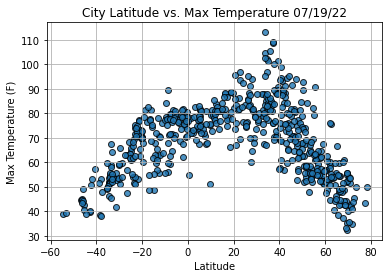

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

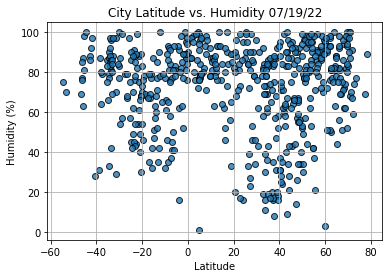

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


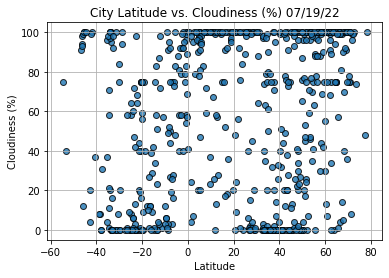

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


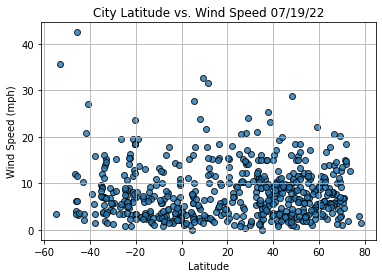

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
